# Explicación inicial de K-Means

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ymeza@ubiobio.cl

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción


Este notebook explica los conceptos básicos del algoritmo de segmentación/clustering K-Means

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas
- numpy
- matplotlib
- sklearn

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer


# Crear datos artificiales

In [ ]:
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=29)

In [ ]:
X[:5]

array([[ 7.4376587 , -4.32118665],
       [-8.19668417,  5.0536879 ],
       [-1.61732772,  1.13717372],
       [-0.92678224,  0.32004995],
       [-1.05250174, -0.1350926 ]])

In [ ]:
print(np.mean(X), np.std(X))

-0.06891859448671422 5.4121436590103


# Visualizar los datos originales

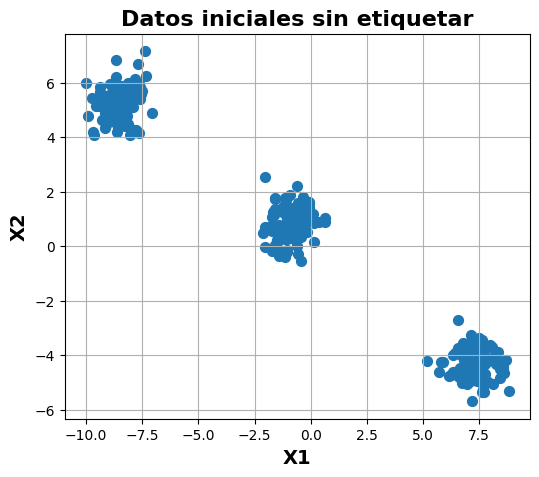

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Datos iniciales sin etiquetar", fontsize=16, fontweight="bold")
plt.xlabel("X1", fontsize=14, fontweight="bold")
plt.ylabel("X2", fontsize=14, fontweight="bold")
plt.grid(True)
plt.show()

# Aplicar KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=29)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
y_kmeans

array([0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 1, 0,
       1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1,
       2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2,
       0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0,
       1, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1,
       2, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1,
       2, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0], d

# Visualizar resultados de clustering

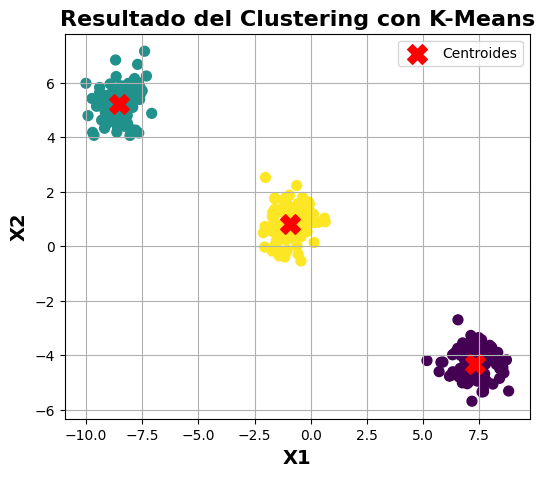

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroides')
plt.title("Resultado del Clustering con K-Means", fontsize=16, fontweight="bold")
plt.xlabel("X1", fontsize=14, fontweight="bold")
plt.ylabel("X2", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True)
plt.show()


# Escalado de datos

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(np.mean(X_scaled), np.std(X_scaled))

-8.363680118842846e-17 1.0000000000000002


In [ ]:
kmeans_x = KMeans(n_clusters=3, n_init=10, random_state=29)
kmeans_x.fit(X_scaled)
y_kmeans_x = kmeans_x.predict(X_scaled)

In [ ]:
y_kmeans_x

array([0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 1, 0,
       1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1,
       2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2,
       0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0,
       1, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1,
       2, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1,
       2, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0], d

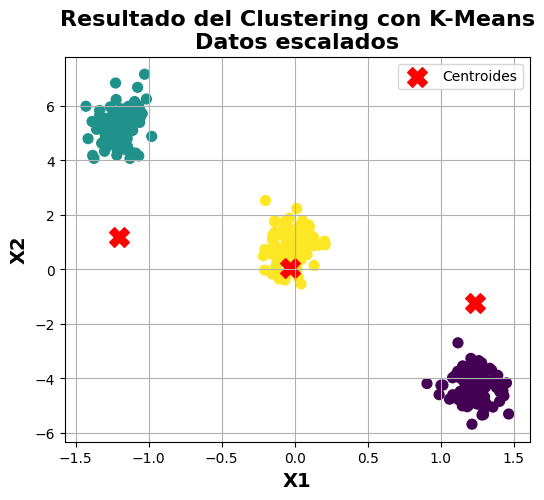

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X[:, 1], c=y_kmeans_x, s=50, cmap='viridis')
plt.scatter(kmeans_x.cluster_centers_[:, 0], kmeans_x.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroides')
plt.title("Resultado del Clustering con K-Means\nDatos escalados", fontsize=16, fontweight="bold")
plt.xlabel("X1", fontsize=14, fontweight="bold")
plt.ylabel("X2", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True)
plt.show()

**¿Qué pasó al escalar?**

✅ **1. K-Means es sensible a la escala de los datos**

Cuando se aplica StandardScaler, se está:

+ Centrando todos los datos alrededor del origen (0, 0).

+ Haciendo que todas las dimensiones tengan la misma importancia.

🧭 ¿Qué cambia con esto?

Antes del escalamiento:

+ Una dimensión con valores más grandes (por ejemplo, x ∈ [0, 1000]) dominaba las distancias.

+ El algoritmo se orientaba principalmente en esa dimensión.

Después del escalamiento:

+ Todas las dimensiones están equilibradas → los puntos están más “concentrados” geométricamente.

+ Esto puede cambiar la forma de los clústeres y hacer que los centroides se reposicionen.

✅ **2. Los centroides se acercan porque los datos están más centrados**

Visualmente, los datos ahora están más comprimidos alrededor del centro del espacio (el origen), lo que puede dar la impresión de que los centroides se agrupan más o están menos dispersos.

Pero esto no significa que K-Means esté fallando. Lo que cambia es:

+ La forma del espacio (de larga y estirada a circular y centrada).

+ La posición relativa de los puntos y los centroides.

✅ **3. ¿Afecta el rendimiento del clustering?**

👉 No negativamente. De hecho, es preferible escalar antes de aplicar K-Means.

Lo que se ve es una consecuencia normal del escalado:

| Antes (sin escalar)                | Después (escalado con `StandardScaler`)        |
| ---------------------------------- | ---------------------------------------------- |
| Clusters más separados visualmente | Clusters más compactos, pero mejor balanceados |
| Una dimensión domina               | Todas las dimensiones tienen igual peso        |


In [ ]:
silhouette_avg = silhouette_score(X_scaled, kmeans_x.labels_)
print("El promedio silhouette_score con data escalada es :", silhouette_avg)

El promedio silhouette_score con data escalada es : 0.8691587035854288


In [ ]:
silhouette_avg_ws = silhouette_score(X, kmeans.labels_)
print("El promedio silhouette_score con data SIN ESCALAR es :", silhouette_avg_ws)

El promedio silhouette_score con data SIN ESCALAR es : 0.8816298124232346


**¿Por qué el índice Silhouette era mejor sin escalar?**

Porque posiblemente:

+ Una dimensión dominaba y separaba bien los datos (aunque ocultando relaciones en otras).

+ Al escalar, esa ventaja desaparece y el modelo se enfoca en patrones globales (a veces menos definidos).

In [ ]:
print(f"Media X1 : {np.mean(X[:,0]) :5f}, STD X1 : {np.std(X[:,0]) :5f}")
print(f"Media X2 : {np.mean(X[:,1]) :5f}, STD X2 : {np.std(X[:,1]) :5f}")

Media X1 : -0.713856, STD X1 : 6.499139
Media X2 : 0.576019, STD X2 : 3.938515


✅  **Interpretación**

+ La primera dimensión (X1) tiene mucha mayor dispersión que la segunda.

+ Esto provoca que K-Means dé más peso a X1 al calcular distancias.

+ El clustering sin escalar estará sesgado hacia esa dimensión dominante.



# Bonus Track

In [ ]:
# Ejemplo mínimo
noticias = [
    "El equipo ganó la final del campeonato de fútbol.",
    "Se registró un aumento en las tasas de interés bancario.",
    "La selección nacional se prepara para el próximo torneo.",
    "La bolsa de valores cerró con pérdidas históricas.",
    "Cristiano Ronaldo fue el máximo goleador de la temporada.",
    "El Banco Central anunció nuevas medidas económicas."
]

# Crear DataFrame
data_noticias = pd.DataFrame({'texto': noticias})

In [ ]:
def normalizar(texto):
    texto = texto.lower()  # pasar a minúsculas
    texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')  # eliminar tildes
    return texto


In [ ]:
data_noticias['texto_normalizado'] = data_noticias['texto'].apply(normalizar)

In [ ]:
data_noticias['texto_normalizado']

,texto_normalizado
0,el equipo gano la final del campeonato de futbol.
1,se registro un aumento en las tasas de interes...
2,la seleccion nacional se prepara para el proxi...
3,la bolsa de valores cerro con perdidas histori...
4,cristiano ronaldo fue el maximo goleador de la...
5,el banco central anuncio nuevas medidas econom...


In [ ]:
# Convertir texto a vectores TF-IDF
stopwords_es = [
    'el', 'la', 'los', 'las', 'de', 'y', 'en', 'se', 'que', 'para', 'con',
    'un', 'una', 'al', 'del', 'por', 'es', 'mas', 'como', 'su', 'entre'
]

vectorizador = TfidfVectorizer(stop_words=stopwords_es)
X_noticias = vectorizador.fit_transform(data_noticias['texto_normalizado'])

In [ ]:
# Agrupar en 2 clústeres (Deporte vs Economía, por ejemplo)
kmeans_noticias = KMeans(n_clusters=2, random_state=29)
data_noticias['cluster'] = kmeans_noticias.fit_predict(X_noticias)

In [ ]:
for i in range(2):
    print(f"\n🧩 Noticias en el clúster {i}:")
    print(data_noticias[data_noticias['cluster'] == i]['texto'].to_string(index=False))


🧩 Noticias en el clúster 0:
 El equipo ganó la final del campeonato de fútbol.
La selección nacional se prepara para el próxim...
La bolsa de valores cerró con pérdidas históricas.
Cristiano Ronaldo fue el máximo goleador de la ...
El Banco Central anunció nuevas medidas económi...

🧩 Noticias en el clúster 1:
Se registró un aumento en las tasas de interés ...


In [ ]:
X_noticias.shape

(6, 32)

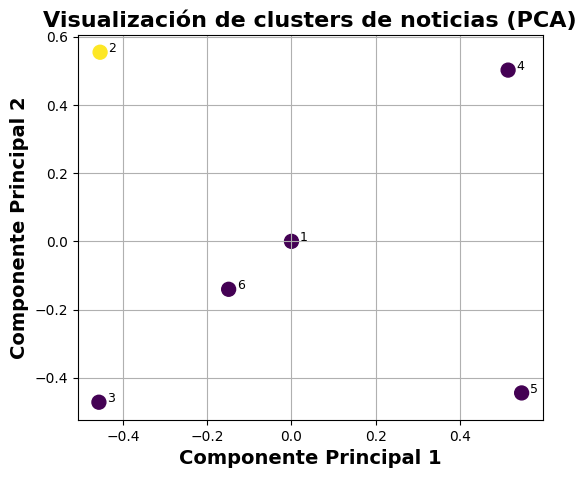

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_noticias.toarray())

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data_noticias['cluster'], cmap='viridis', s=100)
for i, texto in enumerate(data_noticias['texto']):
    plt.text(X_pca[i, 0]+0.02, X_pca[i, 1], f"{i+1}", fontsize=9)
plt.title("Visualización de clusters de noticias (PCA)", fontsize=16, fontweight="bold")
plt.xlabel("Componente Principal 1", fontsize=14, fontweight="bold")
plt.ylabel("Componente Principal 2", fontsize=14, fontweight="bold")
plt.grid(True)
plt.show()
